<a href="https://colab.research.google.com/github/malinphy/q_17/blob/main/umap_config_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install umap-learn -q
!pip install umap-learn[plot] -q
!pip install openai -q
!pip install scann -q

In [3]:
import umap ### dimensionality reduction algorithm
import umap.plot
import plotly.express as px
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import joblib
import os 
import openai
plt.style.use('ggplot')
import scann
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('df_clean_short.csv')
df.head(3)
print(len(df))

vector_dir = 'drive/MyDrive/BBC_content_vectors.npy'
embedding_vectors = np.load(vector_dir)
print((embedding_vectors).shape)

100
(15468, 1536)


In [5]:
embedding_vectors_short = embedding_vectors[0:1600]
embedding_vectors_short.shape

(1600, 1536)

In [6]:
nn = 200, ## nn
md = 0.01 ## md
nc = 1536 ## nc
# umap_reduce = umap.UMAP(n_components = 1536, random_state = 42)
# umap_embeddings = (umap_reduce.fit_transform(embedding_vectors_short))
# np.save('./umap_nc_' + str(nc)+'_nn_'+str(nn)+'_md_'+str(md), umap_embeddings)
# filename = 'this_is_a_test.sav'
# joblib.dump(umap_reduce, 'umap_256')
# umap_reducer_256 = joblib.load('umap_256')
# umap_vectors_256 = np.load('umap_nc_256_nn_(200,)_md_0.01.npy')

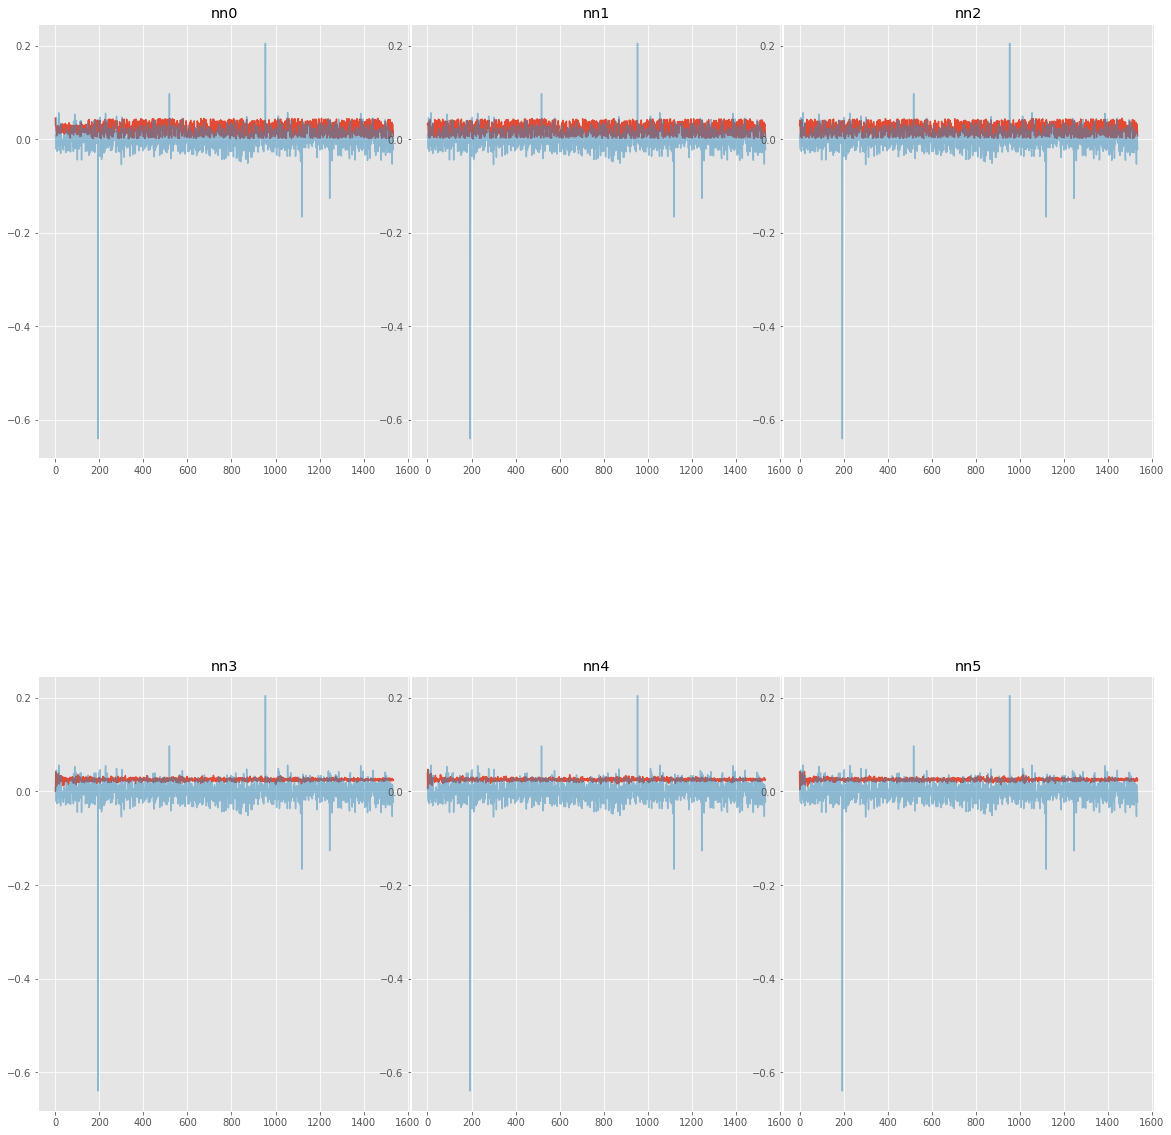

In [10]:
nns = [2, 3, 4, 5, 10, 15, 30, 50, 100, 150]
fig, axs = plt.subplots(2,3, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(6):
    fit = umap.UMAP(n_components = 1536, random_state = 42,n_neighbors=nns[i])
    u = fit.fit_transform(embedding_vectors_short)
    norm_u = u / np.linalg.norm(u[0])
    axs[i].plot(norm_u[0])
    axs[i].plot(embedding_vectors_short[0],alpha =0.5)
    axs[i].set_title('nn'+str(i))
    # axs[i].ylim([-0.2,0.2])

In [8]:
xsafdsa

NameError: ignored

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(3, 3, figsize=(14, 14))
nns = [2, 3, 4, 5, 10, 15, 30, 50, 100]
i, j = 0, 0
for n_neighbors in (nns):
    fit = umap.UMAP(n_neighbors=n_neighbors)
    u = fit.fit_transform(embedding_vectors_short);
    plt.plot(u, ax=ax[j, i])
    ax[j, i].set_title(f'n={n_neighbors}')
    if i < 2: i += 1
    else: i = 0; j += 1

In [ ]:
searcher = scann.scann_ops_pybind.builder(umap_embeddings, 100, "dot_product").tree(
    num_leaves=1500, num_leaves_to_search=100, training_sample_size=250000).score_ah(
    2, anisotropic_quantization_threshold=0.2).reorder(100).build()

In [ ]:
x = umap_reduce.transform(embedding_vectors_short[0].reshape(1,1536))

In [ ]:
searcher.search(x.ravel())[0]

In [ ]:
plt.plot(embedding_vectors_short[0])
plt.plot(x.ravel()/np.linalg.norm(x.ravel()));

In [ ]:
norm_x = x.ravel()/np.linalg.norm(x.ravel())

In [ ]:
searcher2 = scann.scann_ops_pybind.builder(embedding_vectors_short, 40, "dot_product").tree(
    num_leaves=200, num_leaves_to_search=100, training_sample_size=250000).score_ah(
    2, anisotropic_quantization_threshold=0.8).reorder(100).build()

In [ ]:
searcher2.search(x[1].ravel())[0]

In [ ]:
searcher2.search(norm_x.ravel())[0]

In [ ]:
searcher3 = scann.scann_ops_pybind.builder(embedding_vectors, 40, "dot_product").tree(
    num_leaves=2000, num_leaves_to_search=100, training_sample_size=250000).score_ah(
    2, anisotropic_quantization_threshold=0.2).reorder(100).build()